<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/Woe_calculation_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/content
mkdir: cannot create directory ‘gdrive’: File exists
/content/gdrive
mkdir: cannot create directory ‘My Drive’: File exists
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [16]:
!pip install git+https://github.com/CBravoR/scorecardpy
# !pip uninstall scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CBravoR/scorecardpy to /tmp/pip-req-build-zavmv2d4
  Running command git clone --filter=blob:none --quiet https://github.com/CBravoR/scorecardpy /tmp/pip-req-build-zavmv2d4
  Resolved https://github.com/CBravoR/scorecardpy to commit 03ec28470391e5c950580ad9ac4877ca33f05fce
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.3-py3-none-any.whl size=59549 sha256=5e31cdcd362fd40cc1b0b4cc6ded84035de640e2c636900fe52be519b4551ddf
  Stored in directory: /tmp/pip-ephem-wheel-cache-ohiazxqx/wheels/61/36/7f/76fa329f36d896910f2251f5cfd54094c722e088b633e47f6f
Successfully built scorecardpy


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scorecardpy as sc
%matplotlib inline

In [2]:
%cd /content/gdrive/My Drive/Data/
# df = pd.read_csv("transformed_data.csv", low_memory=False, index_col=0)

/content/gdrive/My Drive/Data


## TO be added in Data Cleaning

In [5]:
# To have everything except id
# df = df.iloc[:,1:]
# df = df.drop(columns = ['funded_amnt', 'funded_amnt_inv'])

# df['mths_since_recent_inq'][df['mths_since_recent_inq'] == 0] = 0.5
# df['mths_since_recent_inq'] = 1/df['mths_since_recent_inq']
# df['mths_since_recent_inq'] = df['mths_since_recent_inq'].fillna(0)

In [6]:

# train, test = sc.split_df(df.iloc[:,1:],
#                           y = 'Default',
#                           ratio = 0.7,
#                           seed = 251256517).values()

In [3]:
# train.to_csv('Train.csv')
# test.to_csv('Test.csv')
train = pd.read_csv("Train.csv", low_memory=False, index_col=0)
test = pd.read_csv("Test.csv", low_memory=False, index_col=0)


In [4]:
train['Default']

0          0
2          0
6          1
8          0
10         0
          ..
1280637    0
1280638    0
1280641    0
1280643    0
1280644    1
Name: Default, Length: 848276, dtype: int64

In [5]:
# train_last_19.iloc[:, np.c_[:3, ]

In [6]:
# train_last_19 = train.iloc[:,38:]
# train_last_19['Default']
# ['Default'] = train['Default']
train.Default = train.Default.astype(float)
train.bank_dlq = train.bank_dlq.astype(float)
train.il_acc = train.il_acc.astype(float)
train.dtypes

loan_amnt                     float64
term                           object
installment                   float64
home_ownership                 object
annual_inc                    float64
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
application_type               object
dti_joint                     float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_bal_il                  float64
il_util                       float64
acc_open_pas

In [7]:
train['num_rev_accts']

0          27.0
2           3.0
6          19.0
8          11.0
10          9.0
           ... 
1280637    14.0
1280638     7.0
1280641    21.0
1280643    37.0
1280644    24.0
Name: num_rev_accts, Length: 848276, dtype: float64

In [12]:
train_last_19 = train.iloc[:, 38:] #.drop(columns=['num_rev_accts', 'percent_bc_gt_75'])
# train_last_19['Default'] = train['Default']
# train_last_19[]
# bins = []
# for column in train_last_19.columns:
#     temp = train_last_19[column].to_frame()
#     temp['Default'] = train['Default']
bins = sc.woebin(train_last_19, y = 'Default', 
                min_perc_fine_bin=0.01, # How many bins to cut initially into
                min_perc_coarse_bin=0.02,  # Minimum percentage per final bin
                stop_limit=0.02, # Minimum information value 
                max_num_bin=10, # Maximum number of bins
                method='tree'
                )
        

[INFO] creating woe binning ...
Binning on 848276 rows and 19 columns in 00:01:25


{'payment_history': <Figure size 432x288 with 2 Axes>,
 'coborrower_inc': <Figure size 432x288 with 2 Axes>,
 'num_il_tl': <Figure size 432x288 with 2 Axes>,
 'num_op_rev_tl': <Figure size 432x288 with 2 Axes>,
 'tot_hi_cred_lim': <Figure size 432x288 with 2 Axes>,
 'il_acc': <Figure size 432x288 with 2 Axes>,
 'pct_tl_nvr_dlq': <Figure size 432x288 with 2 Axes>,
 'pub_rec_bankruptcies': <Figure size 432x288 with 2 Axes>,
 'num_sats': <Figure size 432x288 with 2 Axes>,
 'total_bc_limit': <Figure size 432x288 with 2 Axes>,
 'bank_dlq': <Figure size 432x288 with 2 Axes>,
 'num_rev_tl_bal_gt_0': <Figure size 432x288 with 2 Axes>,
 'tax_liens': <Figure size 432x288 with 2 Axes>,
 'total_bal_ex_mort': <Figure size 432x288 with 2 Axes>,
 'total_il_high_credit_limit': <Figure size 432x288 with 2 Axes>,
 'percent_bc_gt_75': <Figure size 432x288 with 2 Axes>,
 'num_rev_accts': <Figure size 432x288 with 2 Axes>,
 'collateral_coverage_ratio': <Figure size 432x288 with 2 Axes>}

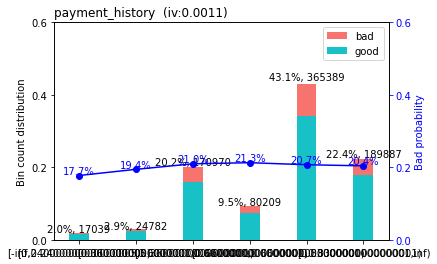

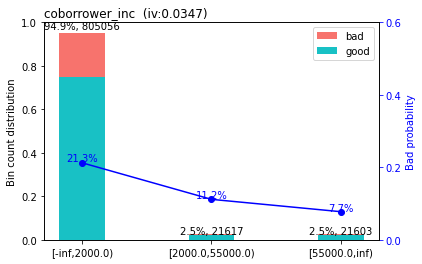

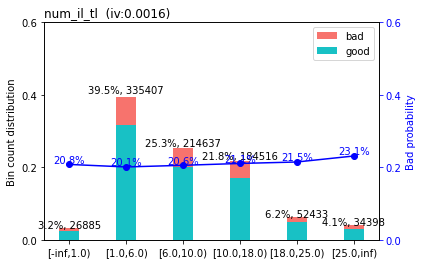

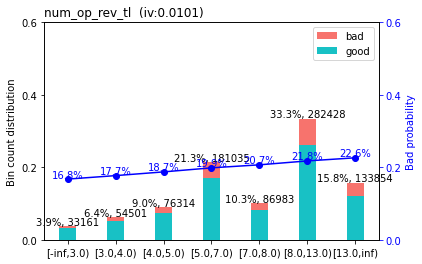

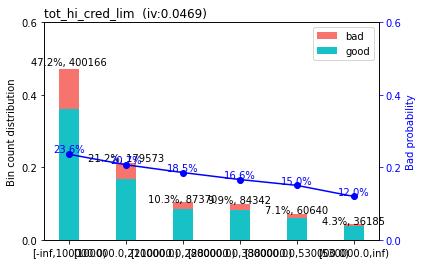

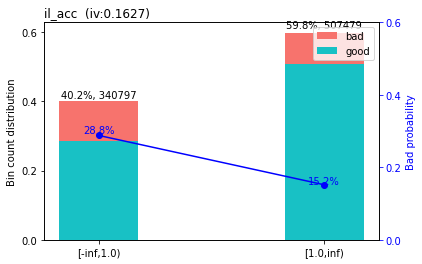

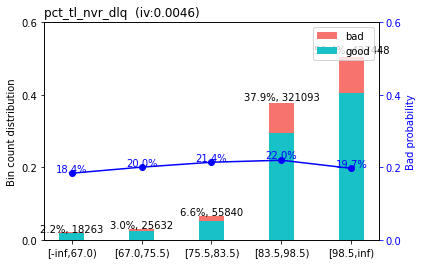

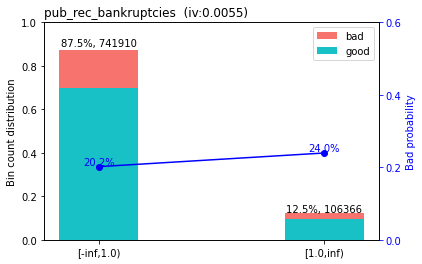

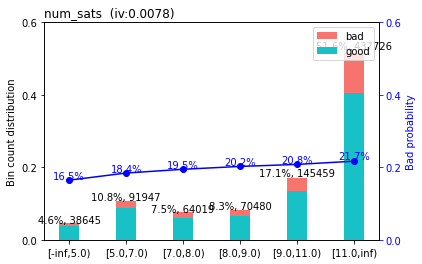

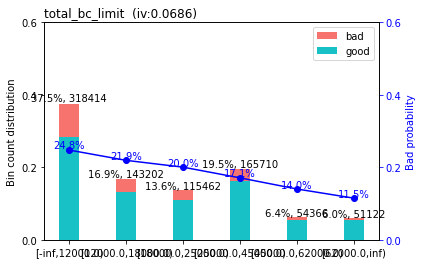

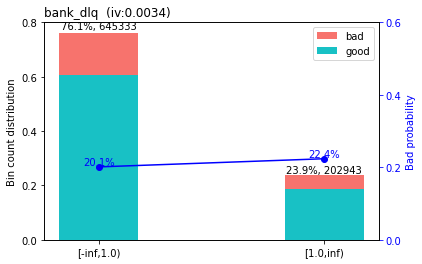

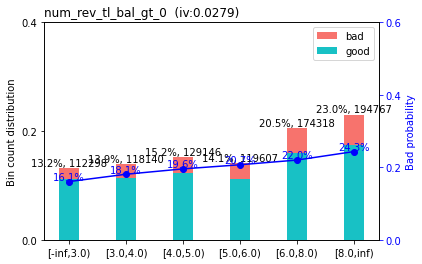

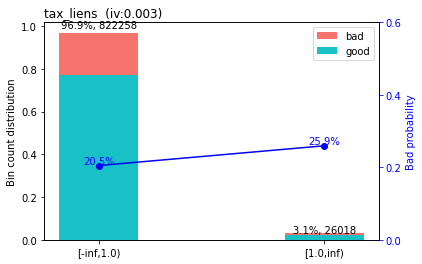

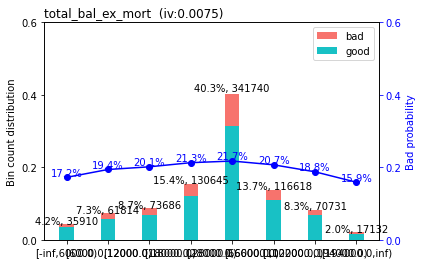

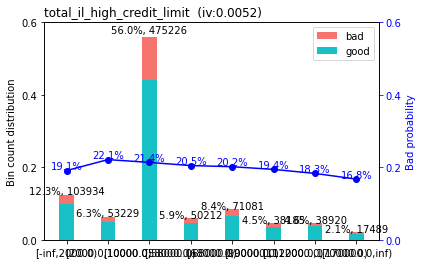

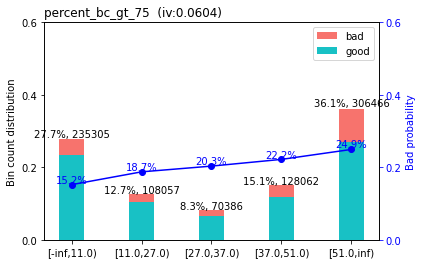

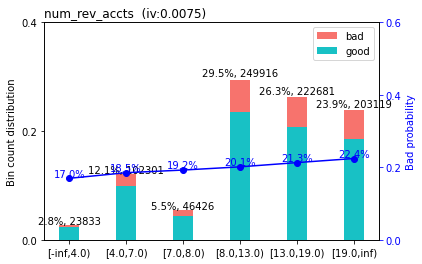

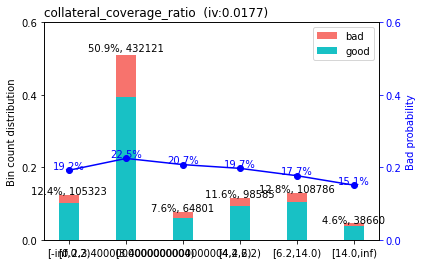

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sc.woebin_plot(bins)

In [ ]:
sc.woebin(train.drop(columns= ['title', 'zip_code', 'addr_state']), y = 'Default', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.03,  # Minimum percentage per final bin
                 stop_limit=0.02, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree'
                 )